In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse
from rtbm import minimizer

from rtbm.mathtools import rtbm_probability

import scipy

from rtbm.rtbm import RiemannTheta

# P(v) plots

# Phase I

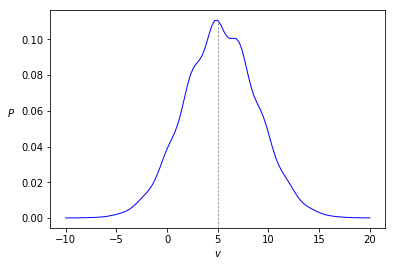

In [166]:
# Setup and plot expectation
Q = np.diag([5.1])
T = np.diag([0.9])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((1,1))
Bh[0,0] = 0.5

W = np.zeros((1,1))
W[0,0] = 2.05

X = np.linspace(-10,20, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.xlabel("$v$")
plt.ylabel('$P$', rotation=0, labelpad=10)

plt.plot(X.flatten(), P[0],"b-", linewidth='1')
plt.axvline(5.05519713,0, 0.94, color="gray", linestyle="--", linewidth=0.75)
#plt.savefig("PvPhaseI-1.eps", format="eps")

In [7]:
# Normalization test
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -40, 40)

(0.9780228578437888, 5.494503054597475e-09)

In [8]:
# Mean test
invT = np.linalg.inv(T)
BvT = Bv.T
BhT = Bh.T
BiTB = np.dot(np.dot(BvT, invT), Bv)
BtiTW = np.dot(np.dot(BvT, invT), W)
WtiTW = np.dot(np.dot(W.T, invT), W)
  
print(1.0/(2j*np.pi)*invT*W*RiemannTheta.normalized_eval((BhT - BtiTW) / (2.0j * np.pi) , (-Q + WtiTW)/ (2.0j * np.pi), mode=1, derivs=np.array( [ [1] ]  )  ) )

[[5.05519713+0.j]]


In [9]:
scipy.integrate.quad(lambda x: np.real(x*rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -41, 41)

(5.1614367505620855, 1.9121983125707652e-08)

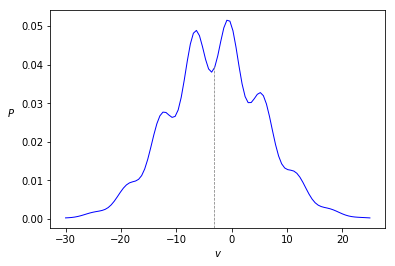

In [167]:
Q = np.diag([8,2.2])
T = np.diag([1.1])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1))
Bh[0,0] = 0.5
Bh[1,0] = -0.5

W = np.zeros((1,2))
W[0,0] = 1.25
W[0,1] = 1.4

X = np.linspace(-30,25, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.xlabel("$v$")
plt.ylabel('$P$', rotation=0, labelpad=10)

plt.plot(X.flatten(), P[0],"b-", linewidth='1')

plt.axvline(-3.09158138,0, 0.75, color="gray", linestyle="--", linewidth=0.75)

#plt.savefig("PvPhaseI-2.eps", format="eps")

In [40]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -30, 30)

(0.9811818619250368, 2.290686546817157e-09)

In [12]:
# Mean test
invT = np.linalg.inv(T)
BvT = Bv.T
BhT = Bh.T
BiTB = np.dot(np.dot(BvT, invT), Bv)
BtiTW = np.dot(np.dot(BvT, invT), W)
WtiTW = np.dot(np.dot(W.T, invT), W)
  
R = RiemannTheta.normalized_eval((BhT - BtiTW) / (2.0j * np.pi) , (-Q + WtiTW)/ (2.0j * np.pi), mode=1, derivs=np.array( [ [1,0],[0,1] ]  )  ) 
print(R)    
print(1.0/(2j*np.pi)*invT.dot(W).dot( R ) )

[[0. -2.02947803j]
 [0.-13.45044934j]]
[[-3.09158138-0.j]]


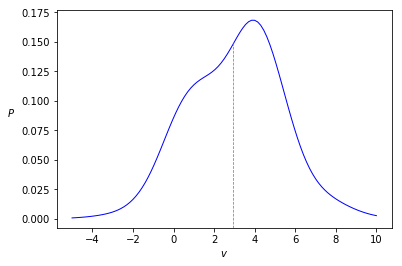

In [168]:
Q = np.diag([8,2.8])
T = np.diag([1.1])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1))
Bh[0,0] = 0.5
Bh[1,0] = -0.5

W = np.zeros((1,2))
W[0,0] = 1.6
W[0,1] = -1.3

X = np.linspace(-5,10, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.xlabel("$v$")
plt.ylabel('$P$', rotation=0, labelpad=10)

plt.plot(X.flatten(), P[0],"b-", linewidth='1')

plt.axvline(2.91729102,0, 0.85, color="gray", linestyle="--", linewidth=0.75)

#plt.savefig("PvPhaseI-3.eps", format="eps")

In [14]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -20, 20)

(0.981982472765519, 8.357101014129921e-09)

In [15]:
scipy.integrate.quad(lambda x: np.real(x*rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -20, 20)

(2.973520552934752, 1.3345858771810234e-08)

In [16]:
# Mean test
invT = np.linalg.inv(T)
BvT = Bv.T
BhT = Bh.T
BiTB = np.dot(np.dot(BvT, invT), Bv)
BtiTW = np.dot(np.dot(BvT, invT), W)
WtiTW = np.dot(np.dot(W.T, invT), W)
  
R = RiemannTheta.normalized_eval((BhT - BtiTW) / (2.0j * np.pi) , (-Q + WtiTW)/ (2.0j * np.pi), mode=1, derivs=np.array( [ [1,0],[0,1] ]  )  ) 
print(R)    
print(1.0/(2j*np.pi)*invT.dot(W).dot( R ) )

[[0. +4.35806251j]
 [0.-10.1461293 j]]
[[2.91729102+0.j]]


# Phase II

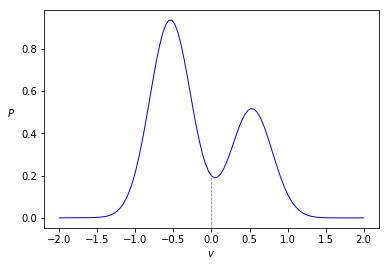

In [169]:
Q = np.diag([1.7])
T = np.diag([4.4])

Bv = np.zeros((1,1))
Bv[0,0] = 0.4

Bh = np.zeros((1,1), dtype=complex)
Bh[0,0] = 3j

W = np.zeros((1,1), dtype=complex)
W[0,0] = 4j

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q, 2)

plt.xlabel("$v$")
plt.ylabel('$P$', rotation=0, labelpad=10)

plt.plot(X.flatten(), P[0],"b-", linewidth='1')
plt.axvline(0,0, 0.25, color="gray", linestyle="--", linewidth=0.75)
#plt.savefig("PvPhaseII-1.eps", format="eps")

In [134]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q, mode=2)[0][0]), -20, 20)

(0.9819824738536422, 8.817400325503155e-11)

In [135]:
scipy.integrate.quad(lambda x: np.real(x*rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q,mode=2)[0][0]), -20, 20)

(-0.15742896836605372, 1.8602243198519858e-09)

In [137]:
# Mean test
invT = np.linalg.inv(T)
BvT = Bv.T
BhT = Bh.T
BiTB = np.dot(np.dot(BvT, invT), Bv)
BtiTW = np.dot(np.dot(BvT, invT), W)
WtiTW = np.dot(np.dot(W.T, invT), W)
  
print(1.0/(2j*np.pi)*invT*W*RiemannTheta.normalized_eval((BhT - BtiTW) / (2.0j * np.pi) , (-Q + WtiTW)/ (2.0j * np.pi), mode=1, derivs=np.array( [ [1] ]  )  ) )

[[0.+2.19241196e-18j]]


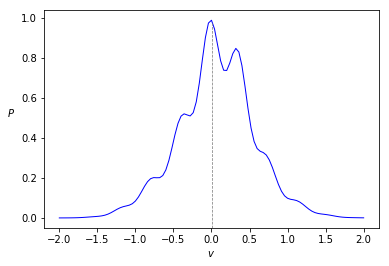

In [170]:
Q = np.diag([5,4.8])
T = np.diag([3.8])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1), dtype=complex)
Bh[0,0] = 0.5j
Bh[1,0] = -0.7j

W = np.zeros((1,2), dtype=complex)
W[0,0] = 15.6j
W[0,1] = 4.3j

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q, 2)

plt.xlabel("$v$")
plt.ylabel('$P$', rotation=0, labelpad=10)

plt.plot(X.flatten(), P[0],"b-", linewidth='1')
plt.axvline(0.01,0, 0.94, color="gray", linestyle="--", linewidth=0.75)
#plt.savefig("PvPhaseII-2.eps", format="eps")

In [20]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q,mode=2)[0][0]), -2, 2)

(0.9946554657848238, 1.5321677070429786e-12)

In [143]:
scipy.integrate.quad(lambda x: np.real(x*rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q,mode=2)[0][0]), -2, 2)

(0.06033634536537651, 5.905300831407282e-13)

In [144]:
# Mean test
invT = np.linalg.inv(T)
BvT = Bv.T
BhT = Bh.T
BiTB = np.dot(np.dot(BvT, invT), Bv)
BtiTW = np.dot(np.dot(BvT, invT), W)
WtiTW = np.dot(np.dot(W.T, invT), W)
  
R = RiemannTheta.normalized_eval((BhT - BtiTW) / (2.0j * np.pi) , (-Q + WtiTW)/ (2.0j * np.pi), mode=2, derivs=np.array( [ [1,0],[0,1] ]  )  ) 
print(R)    
print(1.0/(2j*np.pi)*invT.dot(W).dot( R ) )

[[0.        +0.j]
 [0.04501145+0.j]]
[[0.0081064+0.j]]


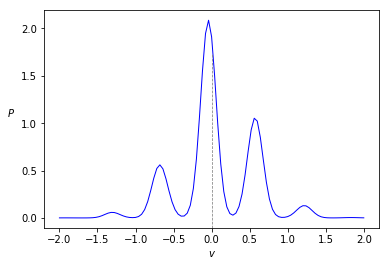

In [171]:
Q = np.diag([1,4.8])
T = np.diag([3.8])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1), dtype=complex)
Bh[0,0] = 0.5j
Bh[1,0] = -0.7j

W = np.zeros((1,2), dtype=complex)
W[0,0] = 9.6j
W[0,1] = 4.3j

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q, 2)

plt.xlabel("$v$")
plt.ylabel('$P$', rotation=0, labelpad=10)

plt.plot(X.flatten(), P[0],"b-", linewidth='1')
plt.axvline(0.01,0, 0.8, color="gray", linestyle="--", linewidth=0.75)

#plt.savefig("PvPhaseII-3.eps", format="eps")

In [22]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q,mode=2)[0][0]), -2, 2)

(0.9946553740469184, 1.3587739478492997e-09)

In [153]:
scipy.integrate.quad(lambda x: np.real(x*rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q,mode=2)[0][0]), -2, 2)

(0.06033634536537651, 5.905300831407282e-13)

In [154]:
# Mean test
invT = np.linalg.inv(T)
BvT = Bv.T
BhT = Bh.T
BiTB = np.dot(np.dot(BvT, invT), Bv)
BtiTW = np.dot(np.dot(BvT, invT), W)
WtiTW = np.dot(np.dot(W.T, invT), W)
  
R = RiemannTheta.normalized_eval((BhT - BtiTW) / (2.0j * np.pi) , (-Q + WtiTW)/ (2.0j * np.pi), mode=2, derivs=np.array( [ [1,0],[0,1] ]  )  ) 
print(R)    
print(1.0/(2j*np.pi)*invT.dot(W).dot( R ) )

[[0.        +0.j]
 [0.04501145+0.j]]
[[0.0081064+0.j]]
